In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
# read scrape in week 2 in
df = pd.read_csv("../data/books_detailed_dataset.csv")
df.head()

,Title,Price,Availability,Stock Count,Rating,Category,UPC,Description
0,A Light in the Attic,Â£51.77,In stock,22,Three,Poetry,a897fe39b1053632,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,Â£53.74,In stock,20,One,Historical Fiction,90fa61229261140a,"""Erotic and absorbing...Written with starling ..."
2,Soumission,Â£50.10,In stock,20,One,Fiction,6957f44c3847a760,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,Â£47.82,In stock,20,Four,Mystery,e00eb4fd7b871a48,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,20,Five,History,4165285e1663650f,From a renowned historian comes a groundbreaki...


In [6]:
df.dtypes

Title           object
Price           object
Availability    object
Stock Count      int64
Rating          object
Category        object
UPC             object
Description     object
dtype: object

In [ ]:
# checking for the null values in the dataset
df.isnull().sum()

Title           0
Price           0
Availability    0
Stock Count     0
Rating          0
Category        0
UPC             0
Description     2
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1000 non-null   object
 1   Price         1000 non-null   object
 2   Availability  1000 non-null   object
 3   Stock Count   1000 non-null   int64 
 4   Rating        1000 non-null   object
 5   Category      1000 non-null   object
 6   UPC           1000 non-null   object
 7   Description   998 non-null    object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


In [13]:
# get the title of the book that has missing description
df[df['Description'].isnull()]['Title']


160    The Bridge to Consciousness: I'm Writing the B...
995    Alice in Wonderland (Alice's Adventures in Won...
Name: Title, dtype: object

## Working with Text Data
* The Dataet contains **Description** Column which has text detailing the product description of each book.
* We will be preprocessing this text and running some nlp technique on it.

In [8]:
# Taking a peek into the Description column
df.Description.head()

0    It's hard to imagine a world without A Light i...
1    "Erotic and absorbing...Written with starling ...
2    Dans une France assez proche de la nÃ´tre, un ...
3    WICKED above her hipbone, GIRL across her hear...
4    From a renowned historian comes a groundbreaki...
Name: Description, dtype: object

## 1). store  the values in the Description column as a list

In [ ]:
# store  the values in the Description column as a list
descriptions = df['Description'].tolist()
# equivalent to this constitution_words = re.sub(r"\s+", " ", constitution_text).strip()

In [15]:
# The values of the first two descriptions seperated ,
descriptions[50:100]

['Although we usually think of technology as something unique to modern times, our ancestors began to create the first technologies millions of years ago in the form of prehistoric tools and weapons. Over time, eight key technologies gradually freed us from the limitations of our animal origins.The fabrication of weapons, the mastery of fire, and the technologies of clothing Although we usually think of technology as something unique to modern times, our ancestors began to create the first technologies millions of years ago in the form of prehistoric tools and weapons. Over time, eight key technologies gradually freed us from the limitations of our animal origins.The fabrication of weapons, the mastery of fire, and the technologies of clothing and shelter radically restructured the human body, enabling us to walk upright, shed our body hair, and migrate out of tropical Africa. Symbolic communication transformed human evolution from a slow biological process into a fast cultural process

Let's preprocess the text data in the Description columns using the descriptions list. following the step below:

## 2) Remove newline characters from the scraped data

In [ ]:
# removing newline from descriptions
'''

  df["Description_clean"] = (...):
Creates a new column in your DataFrame called Description_clean to store the cleaned text.

df["Description"]
Selects the Description column from your DataFrame.

.astype(str)
Converts all values in the Description column to strings (in case there are any non-string values or NaNs).

.str.replace(r"[\r\n\t]+", " ", regex=True)
Replaces any sequence of carriage returns (\r), newlines (\n), or tabs (\t) with a single space.

.str.replace(r"\s{2,}", " ", regex=True)
Replaces any sequence of two or more whitespace characters with a single space (removes extra spaces).

.str.strip()
Removes leading and trailing whitespace from each string.

'''

df["Description_clean"] = (
    df["Description"]
      .astype(str)
      .str.replace(r"[\r\n\t]+", " ", regex=True)
      .str.replace(r"\s{2,}", " ", regex=True)
      .str.strip()
)

# Quick before/after example for 3 rows
example = df[["Description", "Description_clean"]].head(3)
print(example.to_string(index=False))

In [19]:
df.Description_clean.head()

0    It's hard to imagine a world without A Light i...
1    "Erotic and absorbing...Written with starling ...
2    Dans une France assez proche de la nÃ´tre, un ...
3    WICKED above her hipbone, GIRL across her hear...
4    From a renowned historian comes a groundbreaki...
Name: Description_clean, dtype: object

In [ ]:
# to show that the cleaning worked
df.Description == df.Description_clean

0       True
1       True
2      False
3       True
4       True
       ...  
995    False
996     True
997     True
998     True
999     True
Length: 1000, dtype: bool

# 2) Word tokenization (using NLTK)
Word tokenization splits text into word units (tokens). NLTK’s ToktokTokenizer (works out-of-the-box).

In [21]:
df.columns

Index(['Title', 'Price', 'Availability', 'Stock Count', 'Rating', 'Category',
       'UPC', 'Description', 'Description_clean'],
      dtype='object')

In [22]:
from nltk.tokenize.toktok import ToktokTokenizer
from collections import Counter


tokenizer = ToktokTokenizer()

# Tokenize a few example rows for demonstration
def tokenize_words(text: str):
    return tokenizer.tokenize(text)

df["tokens_word"] = df["Description_clean"].astype(str).apply(tokenize_words)

# Show 3 examples with tokens
for i, row in df.head(3).iterrows():
    print(f"\nRow {i} tokens:")
    print(row["tokens_word"])

# Build a simple corpus-level frequency (top 20 words)
all_words = [w.lower() for tokens in df["tokens_word"] for w in tokens if w.strip()]
freq = Counter(all_words).most_common(20)
print("\nTop 20 word frequencies:")
for w, c in freq:
    print(f"{w}: {c}")



Row 0 tokens:
['It', "'", 's', 'hard', 'to', 'imagine', 'a', 'world', 'without', 'A', 'Light', 'in', 'the', 'Attic.', 'This', 'now-classic', 'collection', 'of', 'poetry', 'and', 'drawings', 'from', 'Shel', 'Silverstein', 'celebrates', 'its', '20th', 'anniversary', 'with', 'this', 'special', 'edition.', 'Silverstein', "'", 's', 'humorous', 'and', 'creative', 'verse', 'can', 'amuse', 'the', 'dowdiest', 'of', 'readers.', 'Lemon-faced', 'adults', 'and', 'fidgety', 'kids', 'sit', 'still', 'and', 'read', 'these', 'rhythmic', 'words', 'and', 'laugh', 'and', 'smile', 'and', 'love', 'th', 'It', "'", 's', 'hard', 'to', 'imagine', 'a', 'world', 'without', 'A', 'Light', 'in', 'the', 'Attic.', 'This', 'now-classic', 'collection', 'of', 'poetry', 'and', 'drawings', 'from', 'Shel', 'Silverstein', 'celebrates', 'its', '20th', 'anniversary', 'with', 'this', 'special', 'edition.', 'Silverstein', "'", 's', 'humorous', 'and', 'creative', 'verse', 'can', 'amuse', 'the', 'dowdiest', 'of', 'readers.', 'Lemo

# 3) Character tokenization
Character-level tokens (each character) are useful for building subword models, handling misspellings, and languages with no whitespace.

In [23]:
def tokenize_chars(text: str):
    return list(text)  # simple per-character split

df["tokens_char"] = df["Description_clean"].astype(str).apply(tokenize_chars)

# Show 2 examples
for i, row in df.head(2).iterrows():
    print(f"\nRow {i} char tokens (first 80 chars shown):")
    print(row["tokens_char"][:80])

# Character frequency (letters & digits only for clarity)
import re
chars = []
for cs in df["tokens_char"]:
    for ch in cs:
        if re.match(r"[A-Za-z0-9]", ch):
            chars.append(ch.lower())
char_freq = Counter(chars).most_common(20)
print("\nTop 20 character frequencies (alnum only):")
for ch, c in char_freq:
    print(f"{ch}: {c}")



Row 0 char tokens (first 80 chars shown):
['I', 't', "'", 's', ' ', 'h', 'a', 'r', 'd', ' ', 't', 'o', ' ', 'i', 'm', 'a', 'g', 'i', 'n', 'e', ' ', 'a', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'w', 'i', 't', 'h', 'o', 'u', 't', ' ', 'A', ' ', 'L', 'i', 'g', 'h', 't', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'A', 't', 't', 'i', 'c', '.', ' ', 'T', 'h', 'i', 's', ' ', 'n', 'o', 'w', '-', 'c', 'l', 'a', 's', 's', 'i', 'c', ' ', 'c', 'o', 'l', 'l']

Row 1 char tokens (first 80 chars shown):
['"', 'E', 'r', 'o', 't', 'i', 'c', ' ', 'a', 'n', 'd', ' ', 'a', 'b', 's', 'o', 'r', 'b', 'i', 'n', 'g', '.', '.', '.', 'W', 'r', 'i', 't', 't', 'e', 'n', ' ', 'w', 'i', 't', 'h', ' ', 's', 't', 'a', 'r', 'l', 'i', 'n', 'g', ' ', 'p', 'o', 'w', 'e', 'r', '.', '"', '-', '-', '"', 'T', 'h', 'e', ' ', 'N', 'e', 'w', ' ', 'Y', 'o', 'r', 'k', ' ', 'T', 'i', 'm', 'e', 's', ' ', 'B', 'o', 'o', 'k', ' ']

Top 20 character frequencies (alnum only):
e: 140449
t: 97526
a: 93687
o: 86033
n: 84231
i: 84118
s: 78944
r: 7

# 4) Subword tokenization (practical approach with character n-grams)
What & why

“Subword” can mean BPE/WordPiece or character n-grams. Since training BPE(Byte pair encoding) requires extra packages, an intuitive and replicable route is character n-grams (e.g., 3-grams). This is widely used (e.g., FastText) and great for handling rare words.

In [24]:
def char_ngrams(word: str, n=3):
    w = f"^{word.lower()}$"  # boundary markers help
    return [w[i:i+n] for i in range(len(w)-n+1)]

def subword_tokens(text: str, n=3):
    tokens = []
    for w in text.split():
        tokens.extend(char_ngrams(w, n=n))
    return tokens

df["tokens_subword_3gram"] = df["Description_clean"].astype(str).apply(lambda t: subword_tokens(t, n=3))

# Show one example row of subword tokens
print("Example 3-grams for row 0 (first 60 shown):")
print(df.loc[0, "tokens_subword_3gram"][:60])


Example 3-grams for row 0 (first 60 shown):
['^it', "it'", "t's", "'s$", '^ha', 'har', 'ard', 'rd$', '^to', 'to$', '^im', 'ima', 'mag', 'agi', 'gin', 'ine', 'ne$', '^a$', '^wo', 'wor', 'orl', 'rld', 'ld$', '^wi', 'wit', 'ith', 'tho', 'hou', 'out', 'ut$', '^a$', '^li', 'lig', 'igh', 'ght', 'ht$', '^in', 'in$', '^th', 'the', 'he$', '^at', 'att', 'tti', 'tic', 'ic.', 'c.$', '^th', 'thi', 'his', 'is$', '^no', 'now', 'ow-', 'w-c', '-cl', 'cla', 'las', 'ass', 'ssi']


# 5) Visualize word & character frequency with histograms
Histograms help you see distribution (e.g., many words appear once; a few appear very often). 

lets plot the following:

Word frequency (top 30)

Character frequency (top 30)

Saved histogram: ../figures/top30_word_freq.png
Saved histogram: ../figures/top30_char_freq.png


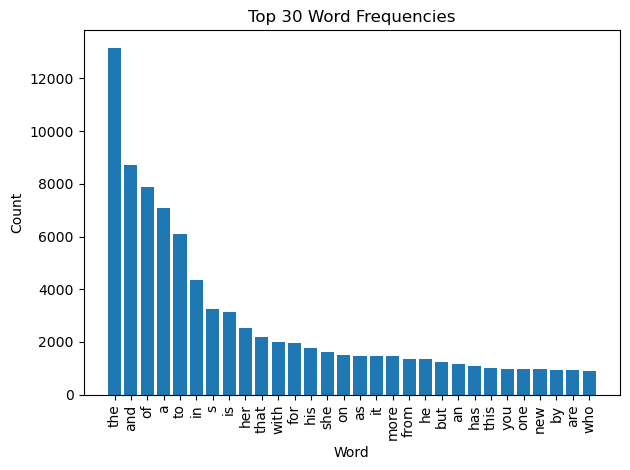

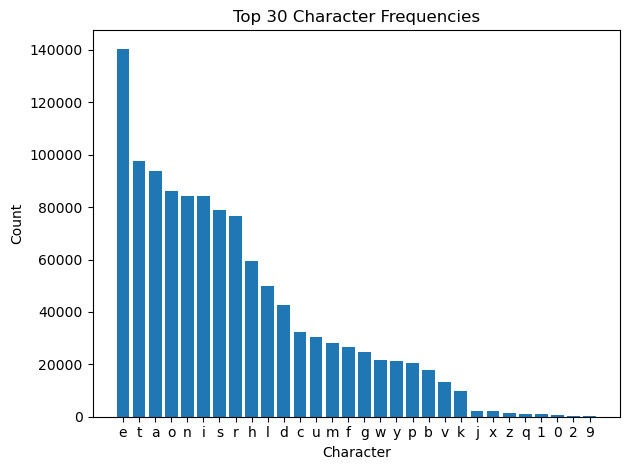

In [26]:
import matplotlib.pyplot as plt
import re


# Word tokens: reuse a simple split for visualization
words = []
for text in df["Description_clean"].astype(str):
    words.extend([w.lower() for w in re.findall(r"[A-Za-z]+", text)])

word_counts = Counter(words).most_common(30)

plt.figure()
plt.bar([w for w,_ in word_counts], [c for _,c in word_counts])
plt.xticks(rotation=90)
plt.title("Top 30 Word Frequencies")
plt.xlabel("Word")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../figures/top30_word_freq.png")
print("Saved histogram: ../figures/top30_word_freq.png")

# Character frequency (alphanumeric only)
chars = []
for ch in "".join(df["Description_clean"].astype(str).tolist()).lower():
    if re.match(r"[a-z0-9]", ch):
        chars.append(ch)
char_counts = Counter(chars).most_common(30)

plt.figure()
plt.bar([ch for ch,_ in char_counts], [c for _,c in char_counts])
plt.title("Top 30 Character Frequencies")
plt.xlabel("Character")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("../figures/top30_char_freq.png")
print("Saved histogram: ../figures/top30_char_freq.png")


# 6) Word Cloud (top words)
A word cloud scales words by frequency. 

In [27]:
 from wordcloud import WordCloud

Saved: ../figures/wordcloud.png


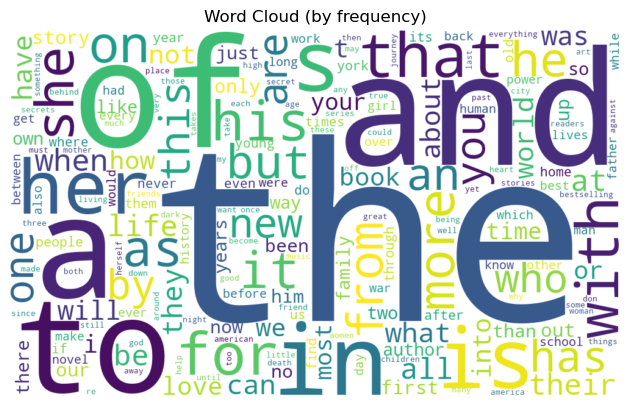

In [28]:
words = []
for text in df["Description_clean"].astype(str):
    words.extend([w.lower() for w in re.findall(r"[A-Za-z]+", text)])

freq = Counter(words)

# Try wordcloud; fallback to saving the top words as CSV if not available
try:
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    wc = WordCloud(width=1000, height=600, background_color="white")
    wc.generate_from_frequencies(freq)

    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud (by frequency)")
    plt.tight_layout()
    plt.savefig("../figures/wordcloud.png")
    print("Saved: ../figures/wordcloud.png")
except Exception as e:
    # Fallback: save top 100 words to CSV (you can plot later)
    top100 = pd.DataFrame(freq.most_common(100), columns=["word", "count"])
    top100.to_csv("../data/top100_words.csv", index=False)
    print("WordCloud not available. Saved top words instead: ../data/top100_words.csv")
    print("Error detail:", e)


# 7) TF-IDF
TF-IDF converts each description into a sparse vector weighting words by rarity across the corpus. Useful for search, clustering, and similarity.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2), min_df=2)
X = vectorizer.fit_transform(df["Description_clean"].astype(str))

print("TF-IDF shape:", X.shape)
# Show the top 10 feature names
print("Sample features:", vectorizer.get_feature_names_out()[:10])

# Show a tiny dense preview for the first 3 rows and first 15 features
import numpy as np
sample = X[:3, :15].toarray()
print("\nTiny preview (first 3 rows x first 15 features):\n", np.round(sample, 3))


TF-IDF shape: (1000, 2000)
Sample features: ['000' '10' '100' '12' 'abandoned' 'able' 'able to' 'about' 'about her'
 'about the']

Tiny preview (first 3 rows x first 15 features):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# 8) Word similarity (from a simple co-occurrence context)

This build a co-occurrence matrix over a window (e.g., ±2 words). Each word’s row is its context vector; cosine similarity between rows ≈ semantic relatedness.

In [30]:
from collections import Counter, defaultdict
import numpy as np

def tokenize_simple(text):
    return re.findall(r"[A-Za-z]+", text.lower())

tokenized = [tokenize_simple(t) for t in df["Description_clean"].astype(str)]
# Build vocab of top N words to keep it small
freq = Counter([w for row in tokenized for w in row])
vocab = [w for w, c in freq.most_common(5000) if c >= 5]  # filter very rare
idx = {w:i for i,w in enumerate(vocab)}

window = 2
cooc = np.zeros((len(vocab), len(vocab)), dtype=np.float32)

for row in tokenized:
    for i, w in enumerate(row):
        if w not in idx: 
            continue
        wi = idx[w]
        left = max(0, i-window)
        right = min(len(row), i+window+1)
        for j in range(left, right):
            if j == i: 
                continue
            v = row[j]
            if v in idx:
                cooc[wi, idx[v]] += 1.0

# Normalize rows to unit length for cosine similarity
row_norms = np.linalg.norm(cooc, axis=1, keepdims=True) + 1e-8
cooc_norm = cooc / row_norms

def most_similar(query, topn=10):
    if query not in idx:
        return []
    qv = cooc_norm[idx[query]]
    sims = cooc_norm @ qv
    # Exclude the word itself
    sims[idx[query]] = -1
    top_idx = sims.argsort()[::-1][:topn]
    return [(vocab[i], float(sims[i])) for i in top_idx]

# Demo with a few queries (change to any word you care about)
for q in ["story", "mystery", "love"]:
    print(f"\nMost similar to '{q}':")
    print(most_similar(q, topn=8))



Most similar to 'story':
[('great', 0.9226000308990479), ('course', 0.9212487936019897), ('notion', 0.9171510934829712), ('member', 0.9023332595825195), ('view', 0.9017977714538574), ('world', 0.8903660178184509), ('one', 0.8892273902893066), ('unwanted', 0.8872019648551941)]

Most similar to 'mystery':
[('secret', 0.8716031312942505), ('murder', 0.8657239079475403), ('powerful', 0.853164553642273), ('wild', 0.8457460403442383), ('mysterious', 0.8436703681945801), ('dark', 0.8433942794799805), ('community', 0.8414496779441833), ('with', 0.8378275036811829)]

Most similar to 'love':
[('history', 0.8529077768325806), ('life', 0.8508570194244385), ('both', 0.8339205980300903), ('religion', 0.8244430422782898), ('oil', 0.8242453932762146), ('language', 0.8167161345481873), ('living', 0.8163971900939941), ('business', 0.8122196197509766)]


# 9) Visualize embeddings (2-D projection)

Once we have vector representations for words, we can project to 2D (PCA/TSNE) and plot selected words to see clusters.

Here, we’ll reuse the co-occurrence vectors (or later, the Word2Vec embeddings) and plot a handful of frequent words.

Saved: ../figures/embedding_pca_cooc.png


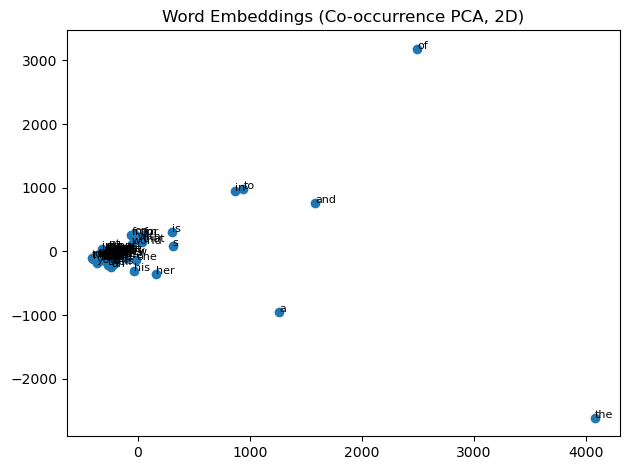

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Pick a small subset of frequent words to label clearly
subset_words = [w for w,_ in Counter(vocab).most_common(0)]  # 'vocab' already frequency-sorted
subset_words = vocab[:60]  # first 60 frequent words
subset_idx = [idx[w] for w in subset_words]
M = cooc[subset_idx]

pca = PCA(n_components=2, random_state=0)
XY = pca.fit_transform(M)

plt.figure()
plt.scatter(XY[:,0], XY[:,1])
for i, w in enumerate(subset_words):
    plt.annotate(w, (XY[i,0], XY[i,1]), fontsize=8)
plt.title("Word Embeddings (Co-occurrence PCA, 2D)")
plt.tight_layout()
plt.savefig("../figures/embedding_pca_cooc.png")
print("Saved: ../figures/embedding_pca_cooc.png")


# 10) Train a word embedding model

We’ll try Gensim Word2Vec (Skip-gram/CBOW). If gensim isn’t available, we’ll fall back to a lightweight PPMI + SVD embedding (no extra installs).

In [34]:
!pip install gensim

   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.8 MB 2.4 MB/s eta 0:00:07
   - -------------------------------------- 0.5/15.8 MB 2.4 MB/s eta 0:00:07
   - -------------------------------------- 0.5/15.8 MB 2.4 MB/s eta 0:00:07
   - -------------------------------------- 0.8/15.8 MB 744.7 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/15.8 MB 824.4 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/15.8 MB 824.4 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/15.8 MB 824.4 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/15.8 MB 824.4 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/15.8 MB 824.4 kB/s eta 0:00:18
   -- ------------------------------------- 1.0/15.8 MB 824.4 kB/s eta 0:00:18
   ---

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
azureml-dataset-runtime 1.59.0 requires numpy!=1.19.4,<1.24; sys_platform == "win32", but you have numpy 1.26.4 which is incompatible.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
tensorflow-intel 2.18.0 requires ml-dtypes<0.5.0,>=0.4.0, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.19.0 which is incompatible.


In [37]:
def tokenize_simple(text):
    return re.findall(r"[A-Za-z]+", text.lower())

sentences = [tokenize_simple(t) for t in df["Description_clean"].astype(str)]

try:
    from gensim.models import Word2Vec
    # Train a small Word2Vec model
    w2v = Word2Vec(
        sentences=sentences,
        vector_size=100,
        window=5,
        min_count=5,
        sg=1,          # 1 = skip-gram, 0 = CBOW
        workers=2,
        epochs=10
    )
    # Save vectors
    w2v.wv.save_word2vec_format("/mnt/data/word2vec_embeddings.txt")
    print("Saved Word2Vec embeddings to /mnt/data/word2vec_embeddings.txt")

    # Demo similarities
    for q in ["story", "mystery", "love"]:
        if q in w2v.wv:
            print(f"\nWord2Vec most similar to '{q}':")
            print(w2v.wv.most_similar(q, topn=8))
except Exception as e:
    print("Gensim not available; falling back to PPMI+SVD embeddings.")
    # Build a small vocab and co-occurrence, then PPMI
    from scipy.sparse import coo_matrix
    freq = Counter([w for s in sentences for w in s])
    vocab = [w for w,c in freq.items() if c >= 5]
    idx = {w:i for i,w in enumerate(vocab)}
    rows, cols, data = [], [], []
    window = 2
    for s in sentences:
        for i, w in enumerate(s):
            if w not in idx: continue
            wi = idx[w]
            for j in range(max(0, i-window), min(len(s), i+window+1)):
                if j==i: continue
                v = s[j]
                if v in idx:
                    rows.append(wi); cols.append(idx[v]); data.append(1)
    X = coo_matrix((data, (rows, cols)), shape=(len(vocab), len(vocab))).tocsr()
    # PPMI
    total = X.sum()
    row_sums = np.array(X.sum(axis=1)).ravel()
    col_sums = np.array(X.sum(axis=0)).ravel()
    # Compute PMI only where X>0
    X_coo = X.tocoo()
    pmi_data = []
    for r, c, v in zip(X_coo.row, X_coo.col, X_coo.data):
        p_wc = v / total
        p_w = row_sums[r] / total
        p_c = col_sums[c] / total
        pmi = np.log2((p_wc / (p_w * p_c)) + 1e-10)
        pmi_data.append(max(0.0, pmi))  # PPMI
    from scipy.sparse import csr_matrix
    PPMI = csr_matrix((pmi_data, (X_coo.row, X_coo.col)), shape=X.shape)
    # SVD to get dense embeddings
    from sklearn.decomposition import TruncatedSVD
    svd = TruncatedSVD(n_components=100, random_state=0)
    E = svd.fit_transform(PPMI)
    np.save("../figures/ppmi_svd_embeddings.npy", E)
    with open("../figures/ppmi_vocab.txt", "w") as f:
        for w in vocab:
            f.write(w + "\n")
    print("Saved PPMI+SVD embeddings: ../figures/ppmi_svd_embeddings.npy and ../figures/ppmi_vocab.txt")


Gensim not available; falling back to PPMI+SVD embeddings.
Saved PPMI+SVD embeddings: ../figures/ppmi_svd_embeddings.npy and ../figures/ppmi_vocab.txt
